In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import skew, kurtosis

# Loading data and intial exploration

In [3]:
url = 'https://raw.githubusercontent.com/devtlv/DailyChallenge-DataAnalysis-W6D5-Mobile_Price_Classification/main/train.csv'
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

All the columns are already in int/float format and there is no null values.

In [26]:
stat_values = df.describe()
mean_values = stat_values.loc['mean']
median_values = stat_values.loc['50%']
std_values = stat_values.loc['std']
mode_values = df.mode().iloc[0]
range = stat_values.loc['max'] - stat_values.loc['min']
variance = df.var()

In [54]:
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range,
    'Variance': variance,
    'Standard Deviation': std_values
})
summary_stats=summary_stats.transpose()
summary_stats.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
Mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.10800,1251.515500,2.124213e+03,12.306500,5.7670,11.011000,0.761500,0.503000,0.507000,1.500000
Median,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.00000,1247.000000,2.146500e+03,12.000000,5.0000,11.000000,1.000000,1.000000,1.000000,1.500000
Mode,618.000000,0.0000,0.500000,1.000000,0.000000,1.000000,27.000000,0.100000,182.000000,4.000000,...,347.00000,874.000000,1.229000e+03,17.000000,1.0000,7.000000,1.000000,1.000000,1.000000,0.000000
Range,1497.000000,1.0000,2.500000,1.000000,19.000000,1.000000,62.000000,0.900000,120.000000,7.000000,...,1960.00000,1498.000000,3.742000e+03,14.000000,18.0000,18.000000,1.000000,1.000000,1.000000,3.000000
Variance,193088.359838,0.2501,0.665863,0.250035,18.848134,0.249663,329.266971,0.083184,1253.135567,5.234197,...,196941.40804,186796.361941,1.176644e+06,17.751433,18.9782,29.854806,0.181709,0.250116,0.250076,1.250625


In [56]:
distribution_shapes = pd.DataFrame({
    'Skewness': df.apply(lambda x: skew(x)),
    'Kurtosis': df.apply(lambda x: kurtosis(x))
})
print(distribution_shapes)

               Skewness  Kurtosis
battery_power  0.031875 -1.224084
blue           0.020001 -1.999600
clock_speed    0.177951 -1.323109
dual_sim      -0.038007 -1.998555
fc             1.019046  0.273386
four_g        -0.086080 -1.992590
int_memory     0.057846 -1.216034
m_dep          0.089015 -1.274164
mobile_wt      0.006553 -1.210351
n_cores        0.003625 -1.229676
pc             0.017293 -1.171571
px_height      0.665771 -0.318075
px_width       0.014776 -1.186041
ram            0.006623 -1.191934
sc_h          -0.098810 -1.190815
sc_w           0.633312 -0.391548
talk_time      0.009505 -1.218545
three_g       -1.227220 -0.493930
touch_screen  -0.012000 -1.999856
wifi          -0.028003 -1.999216
price_range    0.000000 -1.360000


Most columns follow the same pattern of a symmetrical distribution (no skewness) with flatter distribution (negative kurtosis).

# Hypothesis testing

In [58]:
#Null hypothesis: No significant difference between different price groups
#No difference in avg price between dual-sim and no dual-sim

dual_sim = df[df['dual_sim'] == 1]['price_range']
no_dual_sim = df[df['dual_sim'] == 0]['price_range']

t_stat, p_value = stats.ttest_ind(dual_sim, no_dual_sim)
alpha=0.05
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average price between dual-sim and no dual-sim.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average price between dual-sim and no dual-sim.")

t-statistic: 0.7798693301404264
p-value: 0.4355601630195083
Fail to reject the null hypothesis. There is no significant difference in average price between dual-sim and no dual-sim.


In [59]:
#No difference in battery power between phones with touch screen and no touch screen

touch = df[df['touch_screen'] == 1]['battery_power']
no_touch = df[df['touch_screen'] == 0]['battery_power']

t_stat, p_value = stats.ttest_ind(touch, no_touch)
alpha=0.05
print("t-statistic:", t_stat)
print("p-value:", p_value)

if(p_value < alpha):
    print("Reject the null hypothesis. There is a significant difference in average battery power between phones with touch screen and no touch screen.")
else:
    print("Fail to reject the null hypothesis and there is no significant difference in average battery power between phones with touch screen and no touch screen.")

t-statistic: -0.4700732460607114
p-value: 0.6383539903459182
Fail to reject the null hypothesis and there is no significant difference in average battery power between phones with touch screen and no touch screen.


In [63]:
#Is there a correlation between phones with bigger batteries and weight

battery_power = df['battery_power']
weight = df['mobile_wt']

corr = stats.pearsonr(battery_power, weight)

print(f'Correlation coefficient: {corr[0]}')



Correlation coefficient: 0.001844376214570861


In [66]:
#Correlation between clock-speed and number of cores

clock_speed = df['clock_speed']
n_cores = df['n_cores']

corr = stats.pearsonr(clock_speed, n_cores)

print(f'Correlation coefficient: {corr[0]}')
print(f'P value: {corr[1]}')

Correlation coefficient: -0.005724226033792891
P value: 0.7980765299986314


In [65]:
talk_time = df['talk_time']
battery_power = df['battery_power']

corr = stats.pearsonr(talk_time, battery_power)

print(f'Correlation coefficient: {corr[0]}')

Correlation coefficient: 0.05251035465759493


#Data visualisation

In [86]:
price_ranges = df['price_range'].value_counts()
price_ranges

prices = {0: 'Cheap', 1:'Medium',2:'High cost',3:'Very high cost'}
price_ranges.index = price_ranges.index.map(prices)
price_ranges

price_range
Medium            500
High cost         500
Very high cost    500
Cheap             500
Name: count, dtype: int64

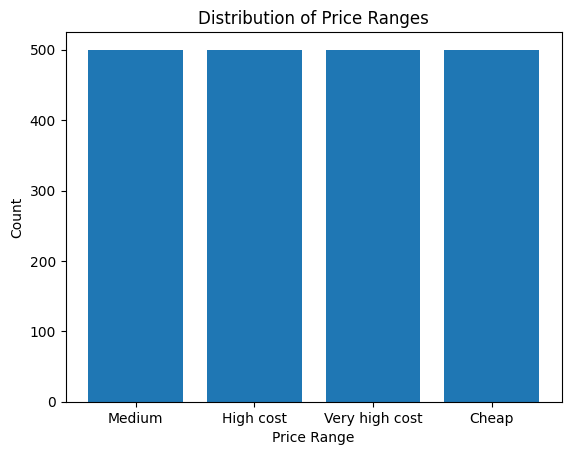

In [92]:

plt.bar(price_ranges.index, price_ranges.values)

plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')
plt.show()

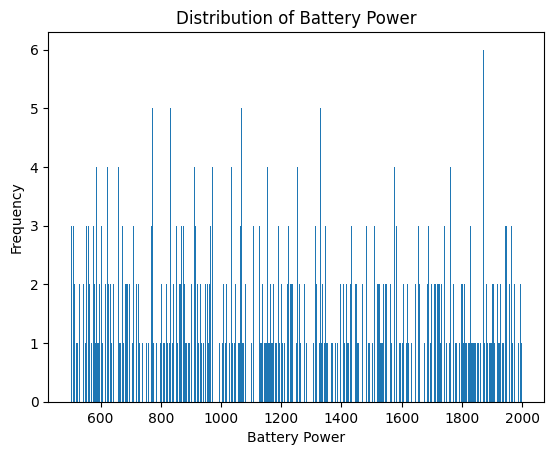

In [107]:
battery_range = df['battery_power'].value_counts()
plt.bar(battery_range.index, battery_range.values)
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')
plt.show()

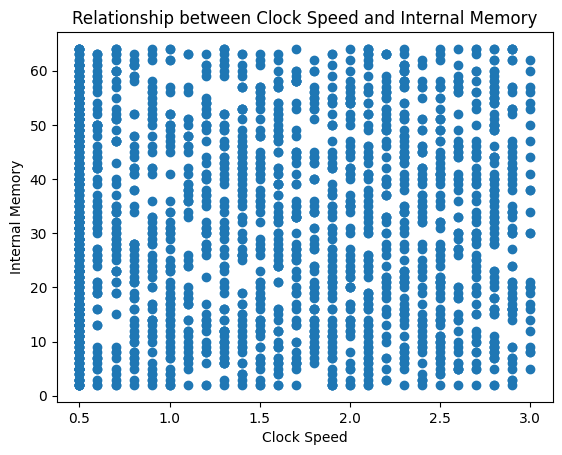

In [117]:
plt.scatter(df['clock_speed'],df['int_memory'])
plt.xlabel('Clock Speed')
plt.ylabel('Internal Memory')
plt.title('Relationship between Clock Speed and Internal Memory')
plt.show()

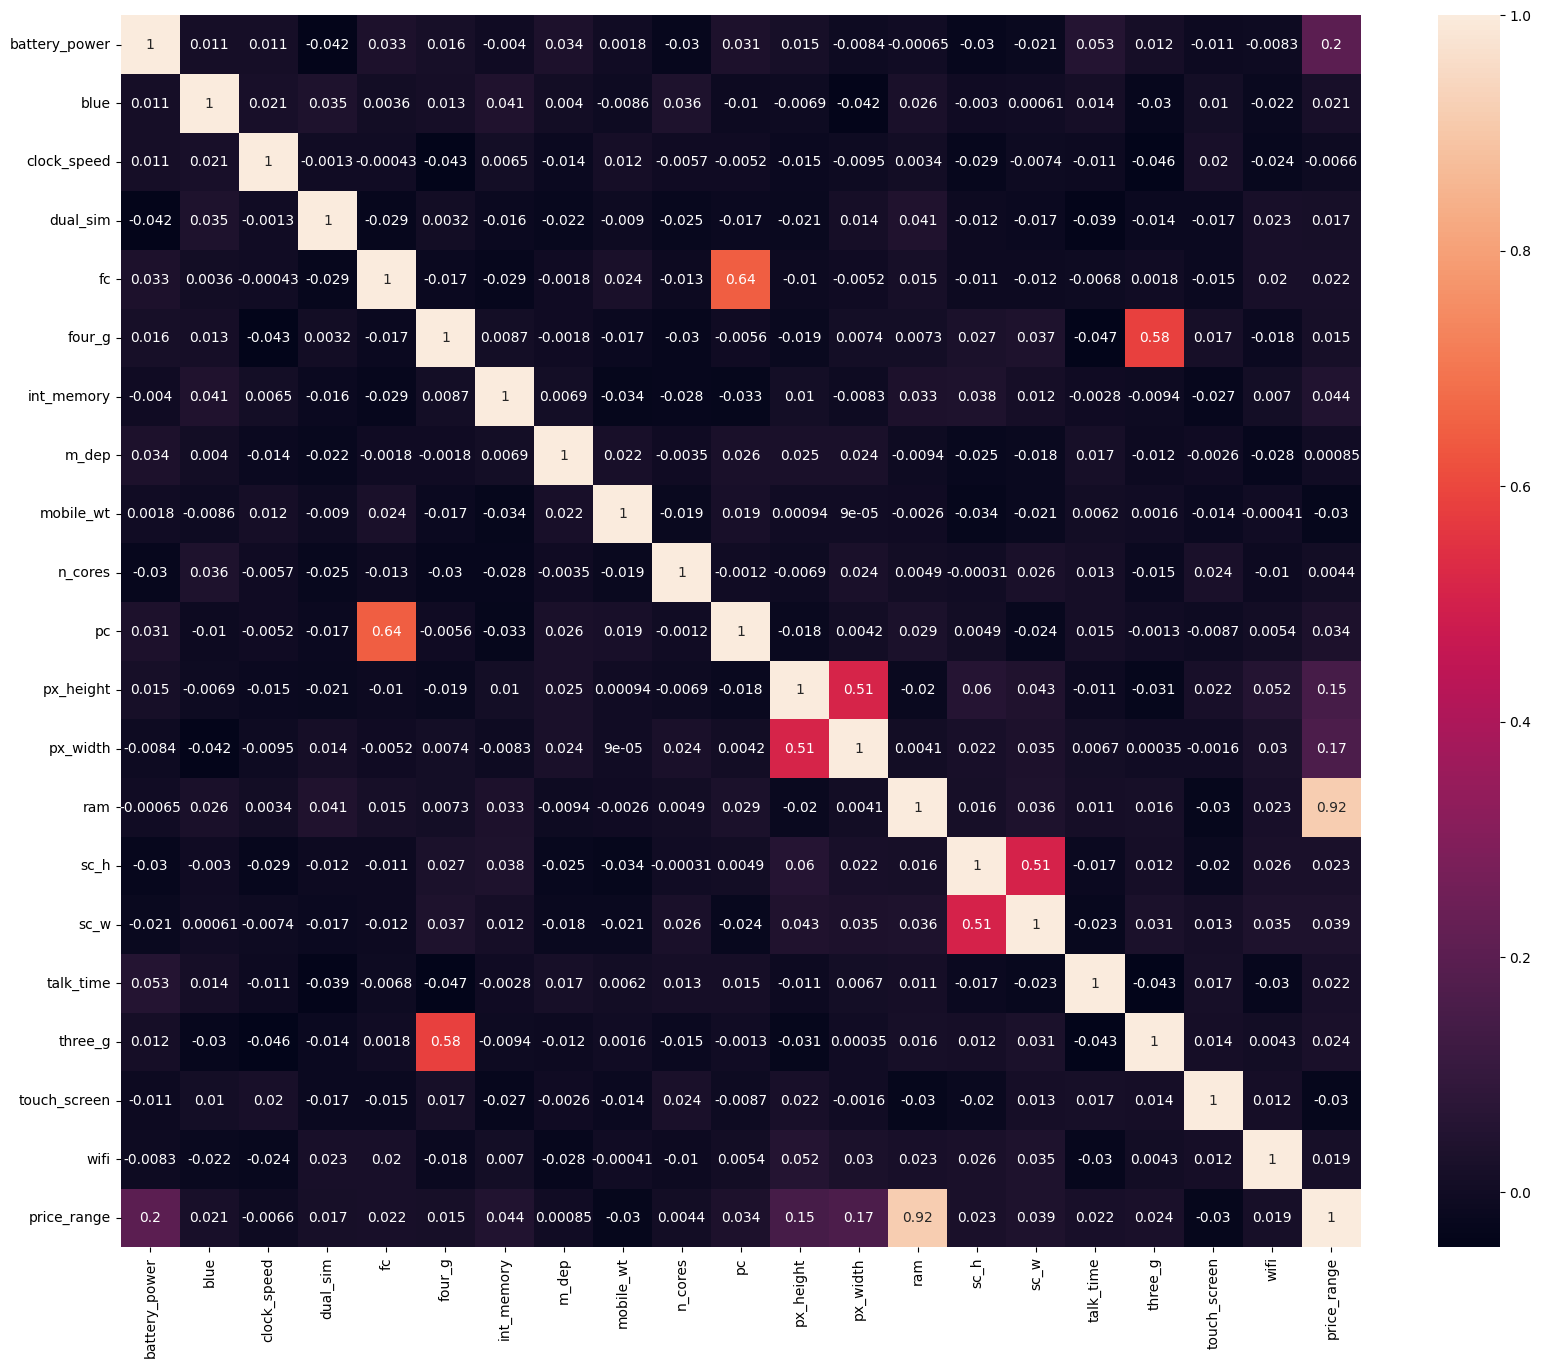

In [126]:
df_heatmap = df.loc[:, df.columns != 'Price_cat']
plt.figure(figsize=(20, 16))
sns.heatmap(df_heatmap.corr(), annot=True)
plt.show()

It seems like there is hardly any significant correlation between variables.

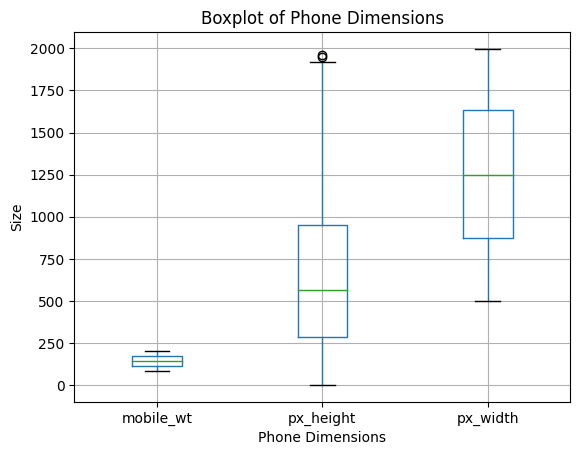

In [134]:
phone_dimensions = df[['mobile_wt', 'px_height', 'px_width']]
phone_dimensions.boxplot()
plt.xlabel('Phone Dimensions')
plt.ylabel('Size')
plt.title('Boxplot of Phone Dimensions')
plt.show()

#Insight and conclusions

After testing for correlations between multiple variables, there does not appear to be significant correlation between any important variables.

I would have expected there to be correlations between battery power and a number of variables like screen size, 4g, talk time. There were also no relations between clock speed and number of cores and RAM.

There was an even number of phones sold under each price category which was surprising. Along with that, you would expect that as the price increases, so would the specs like battery, camera, ram etc etc.